In [0]:
# train with google colab TPU
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import datetime
import json
import os
import pprint
import random
import string
import sys
import numpy as np
import tensorflow as tf

IS_COLAB_BACKEND = 'COLAB_GPU' in os.environ  # this is always set on Colab, the value is 0 or 1 depending on GPU presence
if IS_COLAB_BACKEND:
  from google.colab import auth
  # Authenticates the Colab machine and also the TPU using your
  # credentials so that they can access your private GCS buckets.
  auth.authenticate_user()

### TPU or GPU detection

In [0]:
# Detect hardware
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
  TPU_ADDRESS = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print('TPU address is', TPU_ADDRESS)
except ValueError:
  tpu = None
  gpus = tf.config.experimental.list_logical_devices("GPU")
  print (gpus)
    
# Select appropriate distribution strategy
if tpu:
  tf.config.experimental_connect_to_cluster(tpu)
  tf.tpu.experimental.initialize_tpu_system(tpu)
  strategy = tf.distribute.experimental.TPUStrategy(tpu)
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])  
elif len(gpus) > 1:
  strategy = tf.distribute.MirroredStrategy([gpu.name for gpu in gpus])
  print('Running on multiple GPUs ', [gpu.name for gpu in gpus])
elif len(gpus) == 1:
  strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
  print('Running on single GPU ', gpus[0].name)
else:
  strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
  print('Running on CPU')
print("Number of accelerators: ", strategy.num_replicas_in_sync)

!pip show tensorflow
!pip install transformers
!pip show transformers
!ls
from transformers import *

TPU address is grpc://10.68.115.210:8470
INFO:tensorflow:Initializing the TPU system: 10.68.115.210:8470


INFO:tensorflow:Initializing the TPU system: 10.68.115.210:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Running on TPU  ['10.68.115.210:8470']
Number of accelerators:  8
Name: tensorflow
Version: 2.0.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /tensorflow-2.0.0/python3.6
Requires: keras-preprocessing, numpy, gast, protobuf, astor, keras-applications, six, tensorboard, grpcio, google-pasta, wrapt, opt-einsum, tensorflow-estimator, wheel, absl-py, termcolor
Required-by: stable-baselines, magenta, fancyimpute
Name: transformers
Version: 2.1.1
Summary: State-of-the-art Natural Language Processing for TensorFlow 2.0 and PyTorch
Home-page: https://github.com/huggingface/transformers
Author: Thomas Wolf, Lysandre Debut, Victor Sanh, Julien Chaumond, Google AI Language Team Authors, Open AI team Authors, Facebook AI Authors, Carnegie Mellon University Authors
Author-email: thomas@huggingface.co
License: Apache
Location: /usr/local/lib

### Define data, model, classes, functions

In [0]:
def get_dataset(record_path, max_seq_len=512, class_weights=[]):
    """
      Because distributed strategy does not support class_weights yet.
      so we will convert class weights to sample weights instead.
    """
    name_to_features = {
      "input_ids": tf.io.FixedLenFeature([max_seq_len], tf.int64),
      "attention_mask": tf.io.FixedLenFeature([max_seq_len], tf.int64),
      "token_type_ids": tf.io.FixedLenFeature([max_seq_len], tf.int64),
      "label": tf.io.FixedLenFeature([], tf.int64),
    }

    def _decode_record(example_proto):
        """Decodes a record to a TensorFlow example."""
        example_dict = tf.io.parse_single_example(example_proto, name_to_features)

        # tf.Example only supports tf.int64, but the TPU only supports tf.int32.
        # So cast all int64 to int32.
        features_dict = {}
        for name in list(example_dict.keys()):
            t = example_dict[name]
            if t.dtype == tf.int64:
              t = tf.cast(t, tf.int32)
            if name == "label" and t.dtype != tf.int32:
              t = tf.cast(t, tf.int32)
              print (t)

            example_dict[name] = t
            if name != "label":
                features_dict[name] = t

        label = example_dict["label"]
        
        if class_weights:
          class_weight = tf.constant(1, tf.float32)
          for i, w in enumerate(class_weights):
            if i == label:
              class_weight = tf.constant(class_weights[i])
          return (features_dict, label, class_weight)
        else:
          return (features_dict, label)

    filenames = [record_path]
    raw_dataset = tf.data.TFRecordDataset(filenames)
    print ("raw_dataset: ", raw_dataset)
    parsed_dataset = raw_dataset.map(_decode_record)

    return parsed_dataset

def padd_dataset(dataset, num_padd):
  add_dataset = dataset.take(num_padd)
  padded_dataset = dataset.concatenate(add_dataset)
  return padded_dataset

def get_y(dataset):
  y = []
  for _, b_label in dataset:
    y += b_label.numpy().tolist()
  y = np.array(y)
  return y

import datetime
import scipy
from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    classification_report,
)


class ClassificationMetrics(tf.keras.callbacks.Callback):
  def __init__(self, dev_dataset, dev_y, steps):
    super().__init__()
    self.dev_dataset = dev_dataset
    self.dev_y = dev_y
    self.steps = steps
    self.target_names = ["has_answer", "no_answer"]

    self.val_reports = []
    self.val_logits = []
    self.val_probs = []
    self.val_preds = []
    self.val_accuracies = []
    self.val_losses = []
    self.val_f1s = [] # we only care for the has_answer label

    self.train_batch_losses = []
    self.train_losses = []
    self.train_accuracies = []

  def on_train_begin(self, logs={}):
    pass

  def on_train_batch_end(self, batch, logs=None):
    self.train_batch_losses.append(logs['loss'].item())
  
  def on_epoch_end(self, epoch, logs=None):
    val_logits = self.model.predict(self.dev_dataset, steps=self.steps)    
    val_probs = scipy.special.softmax(val_logits, axis=1)
    val_preds = np.argmax(val_logits, axis=1)

    val_report = classification_report(val_preds, self.dev_y, target_names=self.target_names, output_dict=True)
    self.val_reports.append(val_report)
    val_f1 = val_report["has_answer"]["f1-score"]
    self.val_f1s.append(val_f1)
    print (" has_answer f1: ", val_f1)

    self.val_accuracies.append(logs['val_accuracy'].item())
    self.val_losses.append(logs["val_loss"])
    
    self.val_logits.append(val_logits.tolist())
    self.val_probs.append(val_probs.tolist())
    self.val_preds.append(val_preds.tolist())

    self.train_losses.append(logs['loss'])
    self.train_accuracies.append(logs['accuracy'].item())
  
    return

  def save_results(self, out_dir, file_name):
    import json

    out_path = "{}/{}".format(out_dir, file_name)
    with tf.io.gfile.GFile(out_path, "w") as f:
      res_dict = {
          "target_names": self.target_names,
          "dev_y": self.dev_y.tolist(),
          "val_reports": self.val_reports,
          "val_logits": self.val_logits,
          "val_probs": self.val_probs,
          "val_preds": self.val_preds,
          "val_accuracies": self.val_accuracies,
          "val_losses": self.val_losses,
          "val_f1s": self.val_f1s,
          "train_batch_losses": self.train_batch_losses,
          "train_losses": self.train_losses,
          "train_accuracies": self.train_accuracies,
      }
      json.dump(res_dict, f)
      print ("Write file {}".format(out_path))

def cal_steps(n, batch_size):
  remain = n % batch_size
  padd = batch_size - remain
  steps = n // batch_size + \
                int(padd > 0)

  return steps, padd, remain

def get_dataset_len(dataset_name):
  return int(dataset_name.split('@')[-1].replace('.tfrecord', ''))


### Config bucket folders, model configs, parameters

In [0]:
BUCKET = 'your-bucket-name' #@param {type:"string"} # REPLACE YOUR bucket name here
BUCKET_FOLDER = 'gs://{}'.format(BUCKET)

# input folders
# data folder
BUCKET_DATA_FOLDER = '{}/glue_data/final'.format(BUCKET_FOLDER)
BUCKET_OUT_FOLDER = '{}/out_ensemble/final'.format(BUCKET_FOLDER)

DO_TRAIN = 0 #@param {type:"number"}
DO_EVAL = 1 #@param {type:"number"}

# model, dataset configs
BERT_MODEL = 'bert-base-multilingual-cased' #@param {type:"string"}

CURRENT_MODEL_TYPE = "bert" #@param {type:"string"}
CURRENT_MODEL_NAME = BERT_MODEL #@param {input:"variable"}
CURRENT_MAX_SEQ_LENGTH = 512 #@param {type:"number"}
CURRENT_TRAIN_DATASET = \
  "train90_squad@bert@bert-base-multilingual-cased@512@18302.tfrecord"
CURRENT_TRAIN_BT_DATASET = \
  "btrain90_squad@bert@bert-base-multilingual-cased@512@36604.tfrecord"
CURRENT_TRAIN_100_DATASET = \
  "train100_squad@bert@bert-base-multilingual-cased@512@21562.tfrecord"
CURRENT_TRAIN_100_BT_DATASET = \
  "btrain100_squad@bert@bert-base-multilingual-cased@512@43124.tfrecord"
CURRENT_DEV_DATASET = \
  "dev10@bert@bert-base-multilingual-cased@512@3260.tfrecord"

# Dataset config
DEV_BATCH_SIZE = 32 #@param {type:"number"}
USE_CLASS_WEIGHT = 0 #@param {type:"number"}

### Pick parameters, models

In [0]:
# we test out different parameter pairs
# we use the maximum sequence length which is 512
# learning rate, reg epsilon, batch_size, num_epoch, post_fix
param_pairs = [
  [2e-5, 1e-7, 16, 5, ""], # 0.8 param 2, 3
  [2e-5, 1e-7, 16, 5, "bt"], # 0.8 param 1, 2
  [2e-5, 1e-7, 32, 4, "bt"], # 1, 2
  [2e-5, 1e-7, 32, 4, ""], # 1, 2
  # here for the full train dataset
  # (include the dev set for training also)
  [2e-5, 1e-7, 16, 5, "100"],
  [2e-5, 1e-7, 16, 5, "100bt"],
  [2e-5, 1e-7, 32, 4, "100bt"],
  [2e-5, 1e-7, 32, 4, "100"],
]

CURRENT_PAIR = 7 #@param {type:"number"}
learing_rate = param_pairs[CURRENT_PAIR][0]
epsilon      = param_pairs[CURRENT_PAIR][1]
batch_size   = param_pairs[CURRENT_PAIR][2]
num_epochs   = param_pairs[CURRENT_PAIR][3]
post_fix     = param_pairs[CURRENT_PAIR][4]

train_dataset_name = CURRENT_TRAIN_DATASET
if post_fix == 'bt':
  train_dataset_name = CURRENT_TRAIN_BT_DATASET
elif post_fix == '100':
  train_dataset_name = CURRENT_TRAIN_100_DATASET
elif post_fix == '100bt':
  train_dataset_name = CURRENT_TRAIN_100_BT_DATASET
train_record_path = "{}/{}".format(
    BUCKET_DATA_FOLDER,
    train_dataset_name,
)

dev_dataset_name = CURRENT_DEV_DATASET
dev_record_path = "{}/{}".format(
    BUCKET_DATA_FOLDER,
    dev_dataset_name,
)

train_n = get_dataset_len(train_dataset_name)
dev_n = get_dataset_len(dev_dataset_name)

train_steps, train_padd, train_remain = cal_steps(train_n, batch_size)
dev_steps, dev_padd, dev_remain = cal_steps(dev_n, DEV_BATCH_SIZE)

out_model_name = "{}_lr{}_eps{}_bs{}_ep{}".format(
    CURRENT_MODEL_TYPE,
    learing_rate,
    epsilon,
    batch_size,
    num_epochs,
)
if post_fix:
  out_model_name += "_{}".format(post_fix)
out_model_ckpt_name = "cp-{epoch:02d}.ckpt"
bucket_out_model_root_folder = BUCKET_OUT_FOLDER
bucket_out_model_cp_path = "{}/{}/{}".format(
    bucket_out_model_root_folder, out_model_name, out_model_ckpt_name
)

print ("train_record_path: ", train_record_path)
print ("dev_record_path: ", dev_record_path)
print ("train_n: ", train_n)
print ("dev_n: ", dev_n)

print ("train_remain: ", train_remain)
print ("train_padd: ", train_padd)
print ("train_steps: ", train_steps)

print ("learing_rate: ", learing_rate)
print ("epsilon: ", epsilon)
print ("batch_size: ", batch_size)
print ("num_epochs: ", num_epochs)
print ("post_fix: ", post_fix)
print ("bucket_out_model_root_folder: ", bucket_out_model_root_folder)
print ("out_model_name: ", out_model_name)
print ("out_model_ckpt_name: ", out_model_ckpt_name)
print ("bucket_out_model_cp_path: ", bucket_out_model_cp_path)

train_record_path:  gs://bert-training-bucket/glue_data/final/train100_squad@bert@bert-base-multilingual-cased@512@21562.tfrecord
dev_record_path:  gs://bert-training-bucket/glue_data/final/dev10@bert@bert-base-multilingual-cased@512@3260.tfrecord
train_n:  21562
dev_n:  3260
train_remain:  26
train_padd:  6
train_steps:  674
learing_rate:  2e-05
epsilon:  1e-07
batch_size:  32
num_epochs:  4
post_fix:  100
bucket_out_model_root_folder:  gs://bert-training-bucket/out_ensemble/final
out_model_name:  bert_lr2e-05_eps1e-07_bs32_ep4_100
out_model_ckpt_name:  cp-{epoch:02d}.ckpt
bucket_out_model_cp_path:  gs://bert-training-bucket/out_ensemble/final/bert_lr2e-05_eps1e-07_bs32_ep4_100/cp-{epoch:02d}.ckpt


### Load and config datasets

In [0]:
if tpu:
  train_dataset = get_dataset(train_record_path, max_seq_len=CURRENT_MAX_SEQ_LENGTH)
else:
  # train_dataset = get_dataset(train_record_path, max_seq_len=CURRENT_MAX_SEQ_LENGTH, class_weights=[1.5, 0.7])
  train_dataset = get_dataset(train_record_path, max_seq_len=CURRENT_MAX_SEQ_LENGTH)
dev_dataset = get_dataset(dev_record_path, max_seq_len=CURRENT_MAX_SEQ_LENGTH)

# padd dataset for TPU
train_dataset = padd_dataset(train_dataset, train_padd)
dev_dataset = padd_dataset(dev_dataset, dev_padd)

train_dataset = train_dataset.shuffle(train_n, reshuffle_each_iteration=True).batch(batch_size, drop_remainder=True) # make sure drop_remainder=True for TPU
dev_dataset = dev_dataset.batch(DEV_BATCH_SIZE, drop_remainder=True)

# get dev labels for metrics
dev_y = get_y(dev_dataset)
print ("dev_y.shape: ", dev_y.shape)

train_dataset = train_dataset.repeat(num_epochs)
print ("train_dataset: ", train_dataset)
print ("dev_dataset: ", dev_dataset)

# class weight. TPU doesn't support yet
from sklearn.utils import class_weight
class_weights_dict = {
    0: 1.0,
    1: 1.0,
}
if 0:
  class_weights = class_weight.compute_class_weight('balanced', [0, 1], train_y)
  class_weights_dict = dict(enumerate(class_weights))

raw_dataset:  <TFRecordDatasetV2 shapes: (), types: tf.string>
raw_dataset:  <TFRecordDatasetV2 shapes: (), types: tf.string>
dev_y.shape:  (3264,)
train_dataset:  <RepeatDataset shapes: ({attention_mask: (32, 512), input_ids: (32, 512), token_type_ids: (32, 512)}, (32,)), types: ({attention_mask: tf.int32, input_ids: tf.int32, token_type_ids: tf.int32}, tf.int32)>
dev_dataset:  <BatchDataset shapes: ({attention_mask: (32, 512), input_ids: (32, 512), token_type_ids: (32, 512)}, (32,)), types: ({attention_mask: tf.int32, input_ids: tf.int32, token_type_ids: tf.int32}, tf.int32)>


### Build and train the model

In [0]:
def get_model(lr, eps):
    opt = tf.keras.optimizers.Adam(learning_rate=lr, epsilon=eps, clipnorm=1.0)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

    model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased')
    # model = TFXLMForSequenceClassification.from_pretrained('xlm-mlm-17-1280')
    # model = TFXLMForSequenceClassification.from_pretrained('xlm-mlm-xnli15-1024')
    model.compile(optimizer=opt, loss=loss, metrics=[metric])

    return model

100%|██████████| 1083389348/1083389348 [00:21<00:00, 50546260.37B/s]


Training with params:  [2e-05, 1e-07, 32, 4, '100']


Train on 674 steps, validate on 102 steps
Epoch 1/4
673/674 [============================>.] - ETA: 0s - loss: 0.3942 - accuracy: 0.8170 has_answer f1:  0.884653961885657

Epoch 00001: saving model to gs://bert-training-bucket/out_ensemble/final/bert_lr2e-05_eps1e-07_bs32_ep4_100/cp-01.ckpt
674/674 [==============================] - 315s 468ms/step - loss: 0.3939 - accuracy: 0.8171 - val_loss: 0.1958 - val_accuracy: 0.9295
Epoch 2/4
673/674 [============================>.] - ETA: 0s - loss: 0.2474 - accuracy: 0.8976 has_answer f1:  0.9278350515463918

Epoch 00002: saving model to gs://bert-training-bucket/out_ensemble/final/bert_lr2e-05_eps1e-07_bs32_ep4_100/cp-02.ckpt
674/674 [==============================] - 234s 347ms/step - loss: 0.2473 - accuracy: 0.8976 - val_loss: 0.1148 - val_accuracy: 0.9571
Epoch 3/4
673/674 [============================>.] - ETA: 0s - loss: 0.1521 - accuracy: 0.9421 has_answer f1:  0.9797730636408486

Epoch 00003: saving model to gs://bert-training-bucket/o

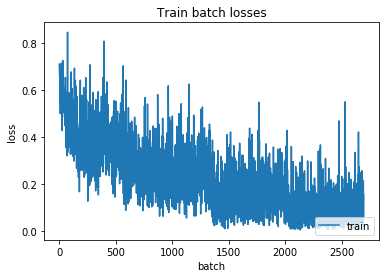

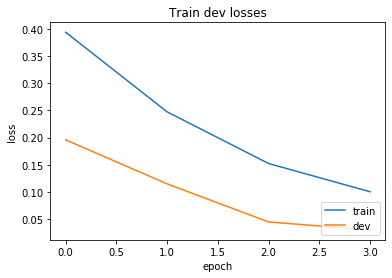

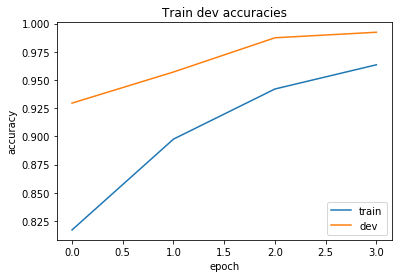

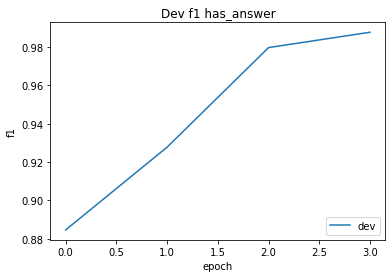

cls_metrics.val_f1s:  [0.884653961885657, 0.9278350515463918, 0.9797730636408486, 0.9877750611246945]


In [0]:
import matplotlib.pyplot as plt

def plot_results(array_data, title, x_label, y_label, legends, loc="lower right"):
  for data in array_data:
    plt.plot(data)
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend(legends, loc=loc)
  plt.show()

if DO_TRAIN:
  cp_callback = tf.keras.callbacks.ModelCheckpoint(
      filepath=bucket_out_model_cp_path,
      save_weights_only=True,
      monitor='val_loss',
      save_freq='epoch',
      verbose=1,
  )

  cls_metrics = ClassificationMetrics(dev_dataset, dev_y, dev_steps)
  bucket_summary_name = "{}.json".format(out_model_name)

  # tf.keras.backend.clear_session()
  with strategy.scope():
    model = get_model(learing_rate, epsilon)

  print ("Training with params: ", param_pairs[CURRENT_PAIR])
  history = model.fit(
              train_dataset,
              validation_data=dev_dataset,
              epochs=num_epochs,
              steps_per_epoch=train_steps,
              validation_steps=dev_steps,
              # sample_weight=train_sample_weights,
              # class_weight=class_weights_dict, # currently not support distributed strategy
              callbacks=[cls_metrics, cp_callback])

  # save results
  cls_metrics.save_results(bucket_out_model_root_folder, bucket_summary_name)

  # plot stuff
  # plot the batch train loss first
  plot_results([cls_metrics.train_batch_losses], "Train batch losses", "batch", "loss", ["train"])

  # plot epoch train, dev losses
  plot_results([cls_metrics.train_losses, cls_metrics.val_losses], "Train dev losses", "epoch", "loss", ["train", "dev"])

  # plot epoch train, dev accuracies
  plot_results([cls_metrics.train_accuracies, cls_metrics.val_accuracies], "Train dev accuracies", "epoch", "accuracy", ["train", "dev"])

  # plot epoch dev f1
  plot_results([cls_metrics.val_f1s], "Dev f1 has_answer", "epoch", "f1", ["dev"])

  print ("cls_metrics.val_f1s: ", cls_metrics.val_f1s)

### Ensemble predict, gen submit functions

In [0]:
if DO_EVAL:
  !mkdir dev_results
  !rm -f dev_results/*
  !gsutil cp {bucket_out_model_root_folder}/*.json dev_results/

mkdir: cannot create directory ‘dev_results’: File exists
Copying gs://bert-training-bucket/out_ensemble/final/bert_lr2e-05_eps1e-07_bs16_ep5.json...
Copying gs://bert-training-bucket/out_ensemble/final/bert_lr2e-05_eps1e-07_bs16_ep5_100.json...
Copying gs://bert-training-bucket/out_ensemble/final/bert_lr2e-05_eps1e-07_bs16_ep5_100bt.json...
Copying gs://bert-training-bucket/out_ensemble/final/bert_lr2e-05_eps1e-07_bs16_ep5_bt.json...
- [4 files][  6.4 MiB/  6.4 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://bert-training-bucket/out_ensemble/final/bert_lr2e-05_eps1e-07_bs32_ep4.json...
Copying gs://bert-training-bucket/out_ensemble/final/bert_lr2e-05_eps1e-07_bs32_ep4_100.json...
Copying gs://bert-training-bucket/out_en

In [0]:
!ls dev_results

bert_lr2e-05_eps1e-07_bs16_ep5_100bt.json
bert_lr2e-05_eps1e-07_bs16_ep5_100.json
bert_lr2e-05_eps1e-07_bs16_ep5_bt.json
bert_lr2e-05_eps1e-07_bs16_ep5.json
bert_lr2e-05_eps1e-07_bs32_ep4_100bt.json
bert_lr2e-05_eps1e-07_bs32_ep4_100.json
bert_lr2e-05_eps1e-07_bs32_ep4_bt.json
bert_lr2e-05_eps1e-07_bs32_ep4.json
best_models.json


In [0]:
import json
import glob

def ensemble_predictions(list_probs):
  arr = np.array(list_probs)
  combined_probs = np.mean(list_probs, axis=0)
  return combined_probs

def find_best_epoch_ckpts(model_name, model_data_type, dev_result, k=2, threshold=0.8):
  # we find best epoch for 100 full dataset later
  # depends on the 90 dataset results
  if model_data_type.startswith('100'):
    return []

  val_f1s = np.array(dev_result["val_f1s"])
  val_losses = np.array(dev_result["val_losses"])
  n_epoch = len(dev_result["val_f1s"])

  # find the two epochs that has the smallest losses
  sorted_idxs = np.argsort(val_losses)

  res_epochs = sorted_idxs[:k]

  print ("model_ame: ", model_name)
  print ("sorted_idxs: ", sorted_idxs)
  print ("sorted val_losses: ", val_losses[sorted_idxs])
  print ("sorted val_f1s: ", val_f1s[sorted_idxs])
  print ("res_epochs: ", res_epochs)

  return (res_epochs + 1).tolist()

def ensemble_on_dev_set(in_dir, dev_y, out_dir, model_type="bert"):
  # 0. find best models
  best_models = [] # name, list epoch ckpts
  list90_probs = []
  for path in tf.io.gfile.glob("{}/{}*.json".format(in_dir, model_type)):
    model_name = path.split("/")[-1].replace(".json", "")
    with tf.io.gfile.GFile(path, 'r') as f:
      dev_result = json.load(f)
    model_data_type = model_name.split('_')[-1]
    epoch_ckpts = find_best_epoch_ckpts(model_name, model_data_type, dev_result)
    best_models.append((model_name, epoch_ckpts))

    # 1. gather predictions from list models
    # we only evaluate on 90% datasets
    if not model_data_type.startswith('100'):
      for ep in epoch_ckpts:
        list90_probs.append(dev_result["val_probs"][ep - 1])
  
  # 2. combine the results
  combined90_probs = ensemble_predictions(list90_probs)
  
  # 3. check the result against the dev_y
  combined90_preds = np.argmax(combined90_probs, axis=1)
  
  # 4. print result
  report90 = classification_report(dev_y, combined90_preds, target_names=["has_answer", "no_answer"], output_dict=True)
  print (report90)

  # 5. update best epochs for 100 datasets based on 90 dataset resutls
  for i, (model_name, epochs) in enumerate(best_models):
    model_data_type = model_name.split('_')[-1]
    if model_data_type.startswith('100'):
      model_name90 = model_name.replace('100', '')
      if model_name90[-1] == '_':
        model_name90 = model_name90[:-1]
      # find the corresponding 90 dataset result
      for (model_namej, epochs90) in best_models:
        if model_namej == model_name90:
          best_models[i] = (model_name, epochs90)
          print ("{} -- {}".format(model_name, model_name90))

  # 6. save the best model list
  best_models_dict = {
      "best_models": best_models,
      "report90": report90,
  }
  out_path = "{}/best_models.json".format(out_dir)
  with tf.io.gfile.GFile(out_path, "w") as f:
    json.dump(best_models_dict, f)
  print ("Write file {}".format(out_path))

  return best_models

if DO_EVAL:
  best_models = ensemble_on_dev_set("dev_results", dev_y, bucket_out_model_root_folder)
  print (best_models)

model_ame:  bert_lr2e-05_eps1e-07_bs32_ep4_bt
sorted_idxs:  [0 1 2 3]
sorted val_losses:  [0.2823588  0.30936212 0.45990221 0.47831058]
sorted val_f1s:  [0.80995935 0.81680162 0.78541667 0.81676326]
res_epochs:  [0 1]
model_ame:  bert_lr2e-05_eps1e-07_bs32_ep4
sorted_idxs:  [0 1 2 3]
sorted val_losses:  [0.28838922 0.2938586  0.33571253 0.36120369]
sorted val_f1s:  [0.77717976 0.79441118 0.81194907 0.80738523]
res_epochs:  [0 1]
model_ame:  bert_lr2e-05_eps1e-07_bs16_ep5
sorted_idxs:  [2 1 3 4 0]
sorted val_losses:  [0.28933679 0.29570438 0.39005449 0.39593623 0.42526946]
sorted val_f1s:  [0.80180632 0.79737903 0.79647851 0.80802882 0.60967945]
res_epochs:  [2 1]
model_ame:  bert_lr2e-05_eps1e-07_bs16_ep5_bt
sorted_idxs:  [0 1 3 2 4]
sorted val_losses:  [0.31054767 0.3414725  0.4595162  0.4630361  0.63810991]
sorted val_f1s:  [0.80695334 0.8023088  0.80564406 0.7867151  0.79650565]
res_epochs:  [0 1]
{'has_answer': {'precision': 0.8621399176954733, 'recall': 0.8199608610567515, 'f1-sco